In [1]:
!pip install networkx igraph -q

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

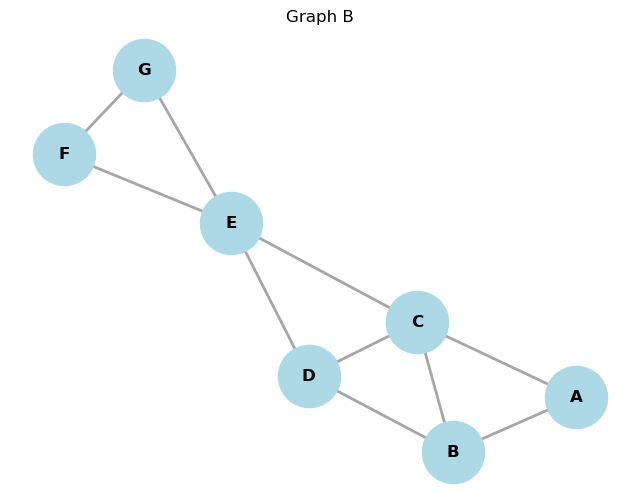

In [3]:
edge_list = [
    ('A', 'B'), ('A', 'C'),
    ('B', 'C'), ('B', 'D'),
    ('C', 'D'), ('C', 'E'),
    ('D', 'E'),
    ('E', 'F'), ('E', 'G'),
    ('F', 'G')
]
G = nx.Graph()
G.add_edges_from(edge_list)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000)
nx.draw_networkx_edges(G, pos, width=2, alpha=0.7, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
plt.axis('off')
plt.title('Graph B')
plt.show()


In [4]:
order_N = G.number_of_nodes()
size_M = G.number_of_edges()
density = nx.density(G)
avg_degree = np.mean([d for n, d in G.degree()])
avg_path_length = nx.average_shortest_path_length(G)
avg_clustering = nx.average_clustering(G)

print(f"Order (N): {order_N}")
print(f"Size (M): {size_M}")
print(f"Density (p): {density:.4f}")
print(f"Average Degree <k>: {avg_degree:.2f}")
print(f"Average Path Length <d>: {avg_path_length:.2f}")
print(f"Average Clustering Coefficient <C>: {avg_clustering:.4f}")

Order (N): 7
Size (M): 10
Density (p): 0.4762
Average Degree <k>: 2.86
Average Path Length <d>: 1.71
Average Clustering Coefficient <C>: 0.7381


In [5]:
print("Degree (k) Distribution:")
degrees = dict(G.degree())
for node, deg in sorted(degrees.items()):
    print(f"Node {node}: {deg}")

Degree (k) Distribution:
Node A: 2
Node B: 3
Node C: 4
Node D: 3
Node E: 4
Node F: 2
Node G: 2


In [6]:
print('Local Clustering Coefficient Distribution:')
clustering = nx.clustering(G)
for node, coeff in sorted(clustering.items()):
    print(f"Node {node}: {coeff:.4f}")

Local Clustering Coefficient Distribution:
Node A: 1.0000
Node B: 0.6667
Node C: 0.5000
Node D: 0.6667
Node E: 0.3333
Node F: 1.0000
Node G: 1.0000


How does the density reflect the overall connectivity?

A density of $\approx 0.476$ is moderately high. It indicates that the network is well-connected, with almost half of all possible connections being present. It is far from being a sparse network.

Does the Average Path Length suggest this is a "small world"?

Yes. An average path length of $\approx 1.71$ is extremely short. It means that, on average, any node can reach any other node in the network in less than two "hops." This high degree of closeness is a defining characteristic of a small-world network.

How does the Average Clustering Coefficient indicate the level of local community formation?

An average clustering coefficient of $\approx 0.738$ is extremely high. This value (which measures the "cliquishness" of neighborhoods) shows a very strong tendency for nodes to form tight-knit local communities. The high values for $C_A$, $C_F$, and $C_G$ (all $1.0$) confirm that their immediate neighborhoods are perfect triangles. This high clustering, combined with the low path length, is the classic signature of a small-world network.

